# Oops! I Spilled the Beans!

A manufacturing plant that processes and packages dry beans has been looking for a way to improve the efficiency of their processes. In particular, they are seeking to discover improvements that can be made to their packaging process and if there are beans that can be treated similarly since they currently have unique processes for each kind of bean. The plant's hope is that if there are several kind of beans that have similar physical properties they can be processed and packaged in the same manner and even on the same line.

The goals for this project is as follows:

1. Develop a model that identifies similarities between different kinds of beans.
2. Apply the results from the model to make an improvement on the current processes in place at the plant.

$\textbf{Citation}$: Dry Bean Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.

The data was produced by taking photos of $13,611$ beans with a camera and a computer vision system was utilized to extract features regarding the physical properties of the each image including shape, type, structure, and form.

Based on the goals from the plant of identifying characteristic similarities a KMeans clustering model seems to be a suitable approach. A KMeans model will be able to identify similarities between types of beans that would be difficult or impossible for a human to identify just by looking at the data. Furthemore, since each feature save for the target is numeric in nature a KMeans model is an apt choice for this use case.

## Data Access and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import pandoc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [391]:
data = pd.read_csv('beans.csv')

The data consists of $13,611$ records with $17$ features describing the physical properties of each bean.

In [392]:
data.shape

(13611, 17)

Note that class is one of the features in the dataset, this will need to be excluded from the training data since we are leveraging an unsupervised learning approach with which we want the algorithm to identify its own similarities apart from pre-defined labels.

In [393]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Looking for the prevalance of missing/null values in the dataset. Thankfully, the provided data is quite clean and has no missing values for any of the features.

In [394]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Inspecting data types and summary statistics. With the exception of 'Area' and 'ConvexArea' all of the non-target features are floats while the area features are integers.

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

There are no apparent outliers in the dataset based on a cursory evaluation.

In [396]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Though there are some outliers according to a box and whisker plot, they are not isolated occurunces indicating that the quality of the measurements appears to be quite consistent.

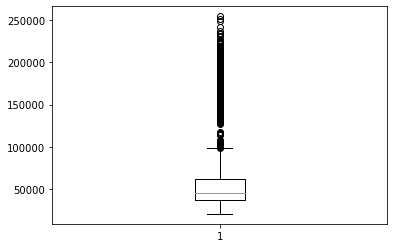

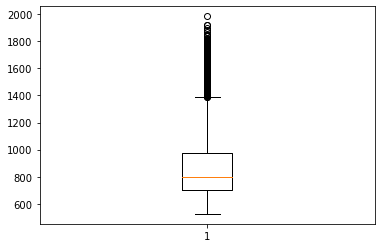

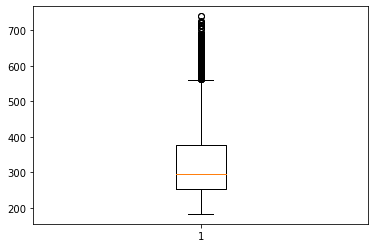

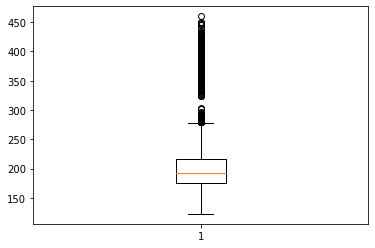

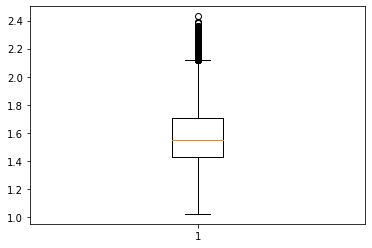

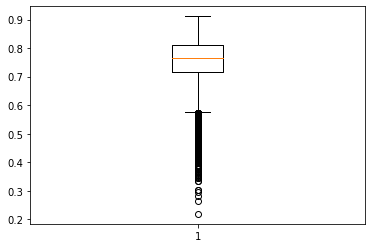

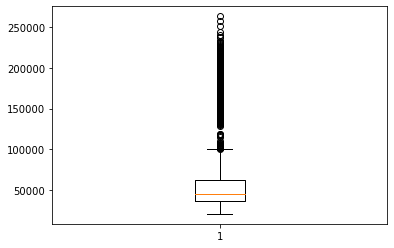

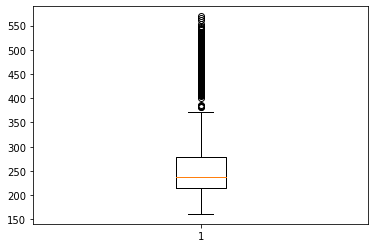

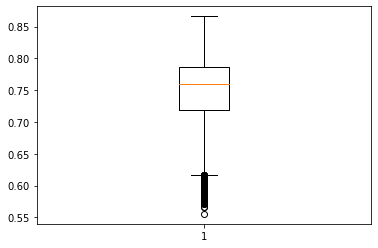

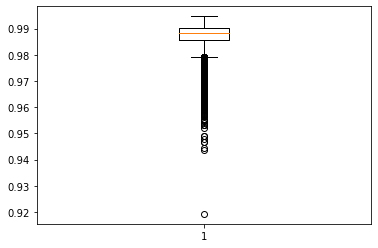

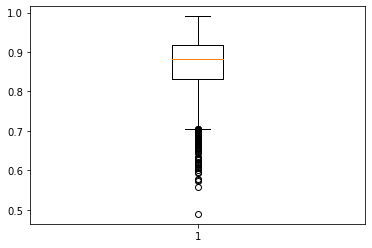

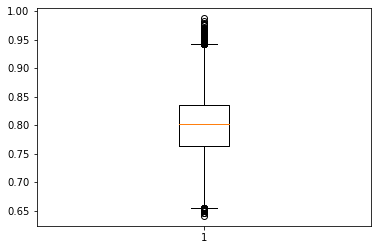

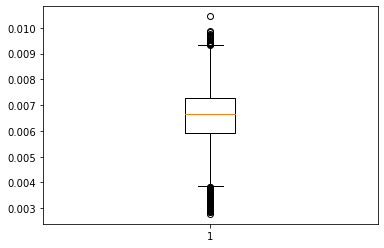

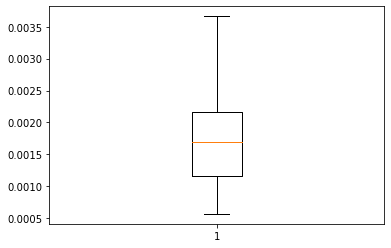

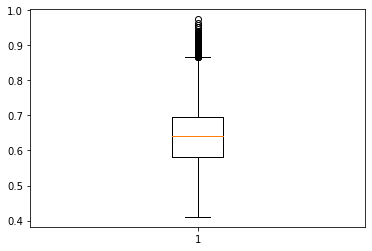

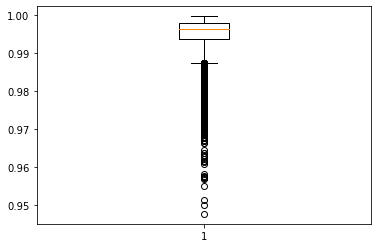

<Figure size 432x288 with 0 Axes>

In [397]:
for feature in data.columns[:-1]:
    plt.boxplot(data[feature])
    plt.show()
    plt.clf()

Examining the levels and distribution of the target class.

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Number of Beans by Kind'}, xlabel='Kind', ylabel='Count'>

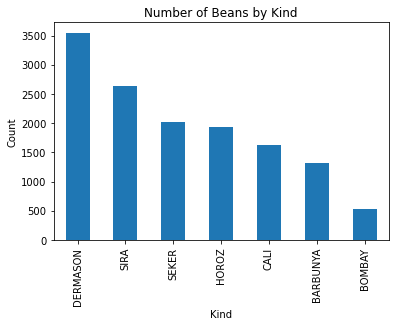

In [398]:
print(data.Class.value_counts())
data.Class.value_counts().plot(kind='bar', ylabel='Count', xlabel='Kind', title='Number of Beans by Kind')

Since there are nearly three times as many Dermason beans as Barbunya beans we will stratify the sample when we train/test split to alleviate any negative effects that may be caused by class imbalance on the off chance we want to explore classifiction once the KMeans model is fit.

Since the dataset consists of features that measure physical attributes of the beans it is unsurprising that there are strong positive and negative correlations present. For example, it makes sense that as the area of a bean increase the perimeter would also increase. Another benefit from a KMeans model is that it does not hold to the linearity assumptions necessary for a linear model and multicollinearity amongst this number of features will not ruin the model's performance.

[Text(0.5, 1.0, 'Correlation Matrix of Features')]

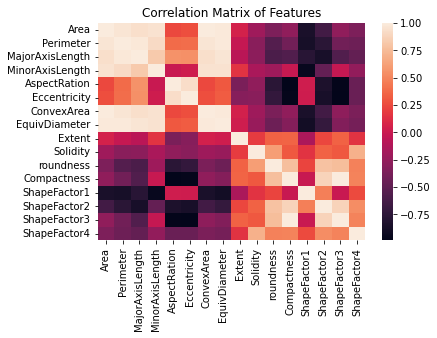

In [399]:
sns.heatmap(data.corr()).set(title = 'Correlation Matrix of Features')

### Model Build & Analysis

Now that we are familiar with shape, quality, and content of the data we can proceed with fitting a KMeans model to the data. This will allow us to idenfity similarities between the six kinds of beans as well as classify the test set of beans and assign them to their kinds.

We will perform a standard train test split with 70% of the records allotted to the training data on which we will fit the model and the remaining 30% assigned to the test data. As discussed earlier we will stratify the split based on the bean class due to the difference in prevalance between types; this will protect us against class imbalance.

In [409]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, stratify=data.iloc[:, -1])

Fitting a KMeans model with $7$ clusters. In this case we start by specifying the number of clusters to be $7$ as there are $7$ types of beans; however, if we notice there are groups of bean types behaving similarly we will reduce this number to provide more simplicity to the plants business processes.

In [410]:
model = KMeans(n_clusters=7, n_init='auto').fit(X_train)

Using the model to predict clusters for the test(holdout) set, and appending the true clusters and predicted clusters to the test data.

In [411]:
test_result = model.predict(X_test)

X_test['true'] = y_test
X_test['pred'] = test_result

Calculating the proportion of true cluster labels (bean types) that belong to each of the predicted clusters.

In [415]:
props = []
for cluster in np.unique(X_test['pred']):
    temp = X_test[X_test['pred'] == cluster]
    clst = pd.DataFrame(temp.groupby(['pred', 'true']).count().iloc[:, 0])
    clst.columns = ['Count']
    clst['Proportion'] = clst['Count']/clst.sum()[0]
    clst.sort_values(by = 'Proportion', ascending = False, inplace=True)
    props.append(clst)
props = pd.concat(props)

In [416]:
props

Count  Proportion
pred true                       
0    CALI        371    0.635274
     BARBUNYA    204    0.349315
     HOROZ         9    0.015411
1    SIRA        687    0.484144
     SEKER       348    0.245243
     HOROZ       235    0.165610
     DERMASON    127    0.089500
     BARBUNYA     20    0.014094
     CALI          2    0.001409
2    BOMBAY       78    1.000000
3    HOROZ       324    0.490909
     BARBUNYA    173    0.262121
     CALI        115    0.174242
     SIRA         40    0.060606
     SEKER         8    0.012121
4    DERMASON    937    0.741884
     SEKER       252    0.199525
     SIRA         64    0.050673
     HOROZ        10    0.007918
5    BOMBAY       50    0.980392
     CALI          1    0.019608
6    BOMBAY       29    1.000000

From the proportions shown above we can glean several takeways. First of all, the KMeans model does not appear to perform exceedingly well in classification as most of the predicted clusters have a mixed bag of bean types. If each of the bean types had distinct physical properties we would see each predicted cluster have a more homogenous collection of bean types.

What we can gather is that there are four distinct groupings that emerge from our clustering efforts.
1. The Bombay beans are quite distinct as they account for three small clusters (2, 5, 6) in which they are the leading factors.
2. The Cali & Barbunya beans account for cluster 0 and show strong similarity as well as their seconary association in cluster 3
3. The Dermason beans are the leading component in cluster 4 and show less similarity to other kinds of beans
4. The Sira, Seker, & Horoz beans are in clusters 1 & 3 and have similar physical attributes.

Having started with $7$ clusters corresponding to the number of bean types we will now re-fit the KMeans clustering model with $4$ clusters since we identified $4$ noticeable segments from the original model fit.

In [444]:
new_model = KMeans(4).fit(X_train)

C:\Users\czonnefeld\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [445]:
new_results = new_model.predict(X_test.iloc[:, :-2])

In [446]:
X_test['true'] = y_test
X_test['pred'] = new_results

In [447]:
props = []
for cluster in np.unique(X_test['pred']):
    temp = X_test[X_test['pred'] == cluster]
    clst = pd.DataFrame(temp.groupby(['pred', 'true']).count().iloc[:, 0])
    clst.columns = ['Count']
    clst['Proportion'] = clst['Count']/clst.sum()[0]
    clst.sort_values(by = 'Proportion', ascending = False, inplace=True)
    props.append(clst)
props = pd.concat(props)

In [448]:
props

Count  Proportion
pred true                       
0    DERMASON   1064    0.586226
     SEKER       448    0.246832
     SIRA        259    0.142700
     HOROZ        44    0.024242
1    CALI        454    0.553659
     BARBUNYA    304    0.370732
     HOROZ        61    0.074390
     SIRA          1    0.001220
2    BOMBAY      157    1.000000
3    SIRA        531    0.410991
     HOROZ       473    0.366099
     SEKER       160    0.123839
     BARBUNYA     93    0.071981
     CALI         35    0.027090

With the reduced number of clusters we see the groupings harden and crystalize. The one change to note is that the Seker beans now associate more closley with Dermason now that there are less clusters to chose from.

The final clusters are as follows:

0. The Dermason & Seker beans share similarity and have some secondary similarity to the Sira beans.
1. The Cali & Barbunya beans show strong physical similarity and seaprate well from the other types.
2. The Bombay beans are quite distinct as they perferctly separate from all of the other beans in the sample.
3. The Sira & Horoz beans share similar physical attributes with a secondary similarity to Seker beans.

### Conclusions

The main takeaway from this project is that of the seven kinds of dry beans processed and packaged by this manufacturing plant they can be reduced to four groups (or clusters) that share strikingly similar physical characteristics. This will allow the plant to reduce the number of methods for processing and packaging from seven down to four. Not only will this increase efficiency, it will also provide more simplicity and a reduce in cost.

The groups of similar bean kinds that can share manufacturing processes are:

0. Dermason & Seker
1. Cali & Barbunya
2. Bombay
3. Sira & Horoz